# MAUDE Database Data Visualization (Q1-2017)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# importing the cleaned dataset
maude = pd.read_csv(r'C:\Users\Tierra\Documents\datasets\maude\maude_2017_q1_cleaned.csv')
maude.head()

C:\Users\Tierra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,brand_name,date_received,device_availability,device_evaluated_by_manufacturer,device_operator,device_report_product_code,device_sequence_number,generic_name,manufacturer_d_city,manufacturer_d_country,...,model_number,adverse_event_flag,date_manufacturer_received,date_of_event,event_location,event_type,health_professional,general_device_name,device_class,medical_specialty
0,TRILOGY 100,2017-01-10,Device was returned to manufacturer,Y,HEALTH PROFESSIONAL,CBK,1.0,"VENTILATOR, CONTINUOUS, FACILITY USE",MURRYSVILLE,US,...,1054260,Y,2016-12-12,2016-11-23,I,Death,Y,"Ventilator, Continuous, Facility Use",2,Anesthesiology
1,CONTOUR NEXT,2017-02-01,Device was returned to manufacturer,Y,LAY USER/PATIENT,NBW,1.0,BLOOD GLUCOSE TEST STRIPS,MISHAWAKA,US,...,7312,Y,2017-02-10,2017-01-08,I,Injury,N,"System, Test, Blood Glucose, Over The Counter",2,Clinical Chemistry
2,UNIFY ASSURA ICD,2017-01-05,No,*,HEALTH PROFESSIONAL,NIK,1.0,IMPLANTABLE CARDIOVERTER DEFIBRILLATOR,SUNNYVALE,US,...,CD3361-40,Y,2016-12-15,2016-12-15,I,Injury,Y,"Defibrillator, Automatic Implantable Cardiover...",3,Unknown
3,640G INSULIN PUMP,2017-01-05,No,R,LAY USER/PATIENT,OYC,1.0,INSULIN INFUSION PUMP / SENSOR AUGMENTED,JUNCOS,US,...,MMT-1711K,N,2016-12-13,2016-12-13,I,Malfunction,N,"Pump, Infusion, Insulin, To Be Used With Invas...",3,Unknown
4,640G INSULIN PUMP,2017-01-06,No,R,LAY USER/PATIENT,OYC,1.0,INSULIN INFUSION PUMP / SENSOR AUGMENTED,JUNCOS,US,...,MMT-1711K,N,2016-12-14,2016-12-14,I,Malfunction,N,"Pump, Infusion, Insulin, To Be Used With Invas...",3,Unknown


## Top 10 Reported on Medical Device Types 

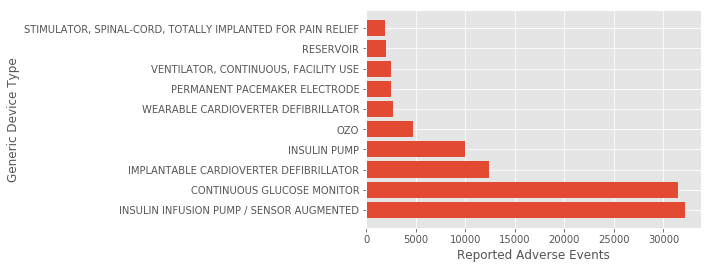

In [3]:
# get top 10 generic device names
generic_name_top_10 = maude['generic_name'].value_counts().head(10)
# plot
plt.barh(generic_name_top_10.index, generic_name_top_10.values)
plt.xlabel('Reported Adverse Events')
plt.ylabel('Generic Device Type')
plt.show()

## Events by date

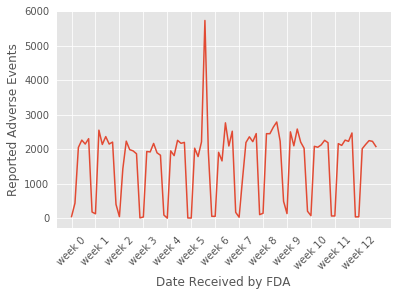

In [4]:
# adverse events by date
by_date = maude['date_received'].value_counts()
# sort by date
by_date = by_date.sort_index()
# line plot of adverse events by the day received
fig, ax = plt.subplots()
ax.plot(by_date.index, by_date.values)
ax.set_xlabel('Date Received by FDA')
ax.set_ylabel('Reported Adverse Events')
# Create ticks every 7 days and label them with the week number
date_points = [x for x in range(len(by_date)) if (x % 7) == 0]
date_names = [("week " + str(x)) for x in range(len(date_points))]
ax.set_xticks(date_points)
ax.set_xticklabels(date_names, rotation=45)

plt.tick_params(
    axis='both',       # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False         # ticks along the left edge are off
)
plt.show()

Adverse event reports are logged at a very steady rate throughout the twelve week period, with a spike during the middle of week 7. 

## Reported Events by Event Types

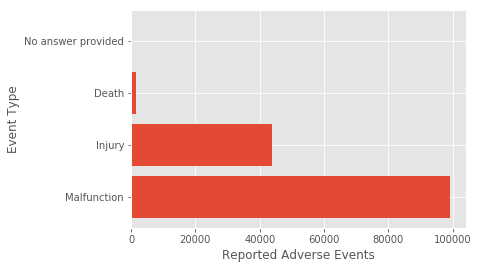

In [5]:

event_type = maude['event_type'].value_counts()
# plot
plt.barh(event_type.index, event_type.values)
plt.xlabel('Reported Adverse Events')
plt.ylabel('Event Type')
plt.show()

## Reported Events by Device Risk Classification

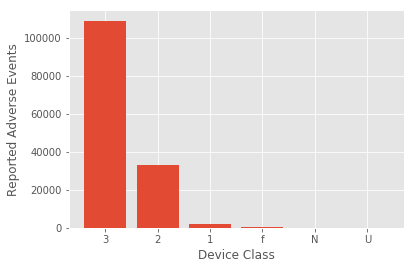

In [6]:
# get the value counts fo the device class
device_class = maude['device_class'].value_counts()
# plot
plt.bar(device_class.index, device_class.values)
plt.ylabel('Reported Adverse Events')
plt.xlabel('Device Class')
plt.show()

The majority of adverse events reported involve Class III medical devices, which are high risk medical devices which are typically life sustaining and/or invasive.  

## Reported Events by Device Operator

The percentatge of devices with reported adverse events that are operated by a Lay User or Patient: 0.64


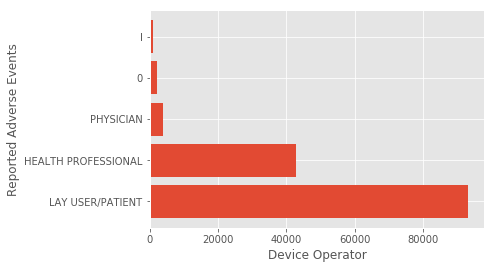

In [7]:
# get the top 5 value counts for the device operator
user = maude['device_operator'].value_counts()
# plot
plt.barh(user.head(5).index, user.head(5).values)
plt.ylabel('Reported Adverse Events')
plt.xlabel('Device Operator')
print("The percentatge of devices with reported adverse events that are operated by a Lay User or Patient: {}".format(
    round(user['LAY USER/PATIENT']/sum(user),2)))
plt.show()

The majority of adverse events reported during the time period, approximately 64% of adverse events reported were operated by a lay user or the patient.  Since the top devices associated with adverse events were insulin pumps and glucose monitors, this makes sense. 

In [8]:
states_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
maude['manufacturer_d_state'] = maude['manufacturer_d_state'].map(states_dict)
# get top 10 generic device names

states = maude['manufacturer_d_state'].value_counts()
popdensity = states.to_dict()

for state in states_dict.values():
    if state not in list(states.index):
        print(state)
        popdensity[state] = 0 

Alaska
Alabama
American Samoa
District of Columbia
Guam
Hawaii
Idaho
Kentucky
Louisiana
Northern Mariana Islands
Montana
National
North Dakota
New Mexico
Nevada
South Carolina
South Dakota
Virgin Islands
Vermont
Wyoming


## Adverse event reporting in the lower 48

In [15]:
# work around for basemap proj_lib error
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "library", "share")

from mpl_toolkits.basemap import Basemap

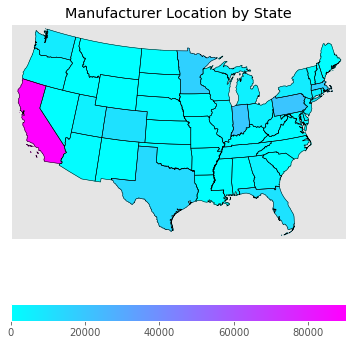

In [55]:
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.cm as cm

fig = plt.figure(figsize=(6,8))
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = cm.cool # use 'cool' colormap
# normalizing the colorbar to the min and max adverse event populations 
vmin = popdensity[min(popdensity.keys(), key=(lambda k: popdensity[k]))]
vmax = popdensity[max(popdensity.keys(), key=(lambda k: popdensity[k]))]
                       
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
                    
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

plt.title('Manufacturer Location by State')
# adding a colorbar 
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) # can be an empty list, only needed for matplotlib < 3.1
cb = fig.colorbar(sm, ax=ax, orientation='horizontal')
plt.show()